In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [7]:
df = pd.read_csv('sb_data.csv')
df['sprint_speed'] = df['sprint_speed'] * (0.68181818 / 1)
df = df[['pa','r_total_stolen_base','sprint_speed']]
col_mapping = {'r_total_stolen_base' : 'sb'}
df.rename(columns=col_mapping, inplace=True)
df = df.sort_values(by = 'sprint_speed')
df

,pa,sb,sprint_speed
70,580,0,16.500000
114,612,3,16.977273
37,526,1,17.045455
117,665,1,17.045455
38,720,0,17.045455
...,...,...,...
73,545,15,20.045454
121,714,37,20.181818
97,645,54,20.522727
124,691,30,20.659091


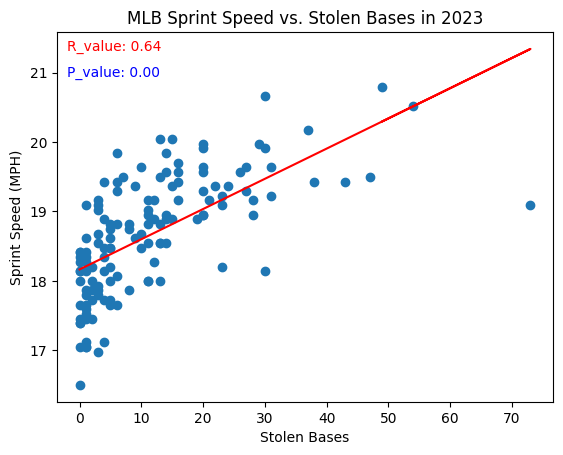

R_value: 0.6445291387662304


In [24]:
slope, intercept, r_value, p_value, std_err = linregress(df['sb'], df['sprint_speed'])

plt.scatter(df['sb'],df['sprint_speed'])
plt.xlabel("Stolen Bases")
plt.ylabel("Sprint Speed (MPH)")
plt.title("MLB Sprint Speed vs. Stolen Bases in 2023")

regression_line = np.polyval([slope, intercept], df['sb'])
plt.plot(df['sb'], regression_line, color='red', label='Regression Line')
plt.text(0.02, 0.95, f'R_value: {r_value:.2f}', transform=plt.gca().transAxes, fontsize=10, color='red')
plt.text(0.02, 0.88, f'P_value: {p_value:.2f}', transform=plt.gca().transAxes, fontsize=10, color='blue')

plt.show()
print(f"R_value: {r_value}")